<a href="https://colab.research.google.com/github/vn322/Wrestling/blob/main/DRB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
#import seaborn as sns
#import matplotlib
#import matplotlib.pyplot as plt


```
1032213202,  4,  6,  16,   5
```


# download

In [2]:
df_act= pd.read_excel('https://github.com/vn322/Sport-University/raw/refs/heads/main/combat/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%9A%D0%BE%D0%BA%D0%B8%D0%BD,%20%D0%A1%D0%B2%D0%B5%D1%80%D1%87%D0%BA%D0%BE%D0%B2,%20%D0%A5%D0%B0%D1%87%D0%B0%D1%82%D1%80%D1%8F%D0%BD.xlsx', sheet_name= 0)
df_act.head(3)

,fighter1,fighter2,stage,start_ep,end_ep,attacker,actions_1,actions_2,results_1,results_2
0,ilkvl0198,karma0692,четвертьфинал,04:47:00,04:48:00,1,алнбк,алрпг,1,0
1,ilkvl0198,karma0692,четвертьфинал,04:31:00,04:30:00,2,бл,апрпк,0,0
2,ilkvl0198,karma0692,четвертьфинал,04:28:00,04:26:00,2,апрбг,"апрпг, апрпг, алрпг",1,"1,0,0"


In [3]:
df_par= pd.read_excel('https://github.com/vn322/Sport-University/raw/refs/heads/main/combat/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%9A%D0%BE%D0%BA%D0%B8%D0%BD,%20%D0%A1%D0%B2%D0%B5%D1%80%D1%87%D0%BA%D0%BE%D0%B2,%20%D0%A5%D0%B0%D1%87%D0%B0%D1%82%D1%80%D1%8F%D0%BD.xlsx', sheet_name= 1)
df_par.head(3)

,id,name,nation,place,weight_over_73,birthdate
0,gusil0194,GUSEYNOV IIgar,Russia,1,0,1994-01-21
1,makda0401,MAKAGONOV Daniel,Russia,2,0,2001-04-03
2,khias0501,KHIKMATOV Asadbek,Uzbekistan,3,0,2001-05-16


In [4]:
df_par = df_par.drop('name', axis=1)

In [5]:
df_spr= pd.read_excel('https://github.com/vn322/Sport-University/raw/refs/heads/main/combat/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%9A%D0%BE%D0%BA%D0%B8%D0%BD,%20%D0%A1%D0%B2%D0%B5%D1%80%D1%87%D0%BA%D0%BE%D0%B2,%20%D0%A5%D0%B0%D1%87%D0%B0%D1%82%D1%80%D1%8F%D0%BD.xlsx', sheet_name= 2)
df_spr.head(3)

,action,abbreviation,description
0,атака,алрпг,атака левой рукой прямой удар в область головы
1,атака,апрпг,атака правой рукой прямой удар в область головы
2,атака,алнбк,атака левой ногой боковой удар в туловище


# NLP

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
df_act.head(3)

,fighter1,fighter2,stage,start_ep,end_ep,attacker,actions_1,actions_2,results_1,results_2
0,ilkvl0198,karma0692,четвертьфинал,04:47:00,04:48:00,1,алнбк,алрпг,1,0
1,ilkvl0198,karma0692,четвертьфинал,04:31:00,04:30:00,2,бл,апрпк,0,0
2,ilkvl0198,karma0692,четвертьфинал,04:28:00,04:26:00,2,апрбг,"апрпг, апрпг, алрпг",1,"1,0,0"


In [25]:
#df_word = df_act[['actions_1', 'actions_2']]
df_word = df_act['actions_1'] + '. '+ df_act['actions_2']
df_word.head(2)

,0
0,алнбк. алрпг
1,бл. апрпк


In [170]:
df_word = df_word.to_frame()

In [171]:
type(df_word)

pandas.core.frame.DataFrame

In [172]:
df_word.columns

RangeIndex(start=0, stop=1, step=1)

Самый простой способ извлечь фичи из текстовых данных -- векторизаторы: `CountVectorizer` и `TfidfVectorizer`

Объект `CountVectorizer` делает простую вещь:
* строит для каждого документа (каждой пришедшей ему строки) вектор размерности `n`, где `n` -- количество слов или n-грам во всём корпусе
* заполняет каждый i-тый элемент количеством вхождений слова в данный документ

In [161]:
vec = CountVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(df_word) # bow -- bag of words (мешок слов)

In [162]:
sac = list(vec.vocabulary_.items())
sac = sorted(sac, key=lambda item: item[1], reverse=True)
sac

[('ухуд', 50),
 ('укл', 49),
 ('ппудпр', 48),
 ('ппудп', 47),
 ('ппуд', 46),
 ('ппбп', 45),
 ('ппблпр', 44),
 ('ппб', 43),
 ('пб', 42),
 ('оск', 41),
 ('окт', 40),
 ('ныр', 39),
 ('нкд', 38),
 ('нк', 37),
 ('кабр', 36),
 ('каб', 35),
 ('зот', 34),
 ('зон', 33),
 ('бл', 32),
 ('апрсг', 31),
 ('апррг', 30),
 ('апрпк', 29),
 ('апрпг', 28),
 ('апрг', 27),
 ('апрвк', 26),
 ('апрбк', 25),
 ('апрбг', 24),
 ('аппг', 23),
 ('апнрк', 22),
 ('апнрг', 21),
 ('апнр', 20),
 ('апнпк', 19),
 ('апнпг', 18),
 ('апнлк', 17),
 ('апнбк', 16),
 ('апнбг', 15),
 ('алрсг', 14),
 ('алрпк', 13),
 ('алрпг', 12),
 ('алрбк', 11),
 ('алрбг', 10),
 ('алпк', 9),
 ('алнр', 8),
 ('алнпк', 7),
 ('алнпг', 6),
 ('алнлк', 5),
 ('алндк', 4),
 ('алнвк', 3),
 ('алнбк', 2),
 ('алнбг', 1),
 ('алвпг', 0)]

`ngram_range` отвечает за то, какие n-граммы мы используем в качестве фичей:<br/>
* ngram_range=(1, 1) -- униграммы<br/>
* ngram_range=(3, 3) -- триграммы<br/>
* ngram_range=(1, 3) -- униграммы, биграммы и триграммы.

В `vec.vocabulary_` лежит словарь: мэппинг слов к их индексам:

In [28]:
from nltk import ngrams

In [29]:
list(ngrams(df_word, 1))[:2] # униграммы

[('алнбк. алрпг',), ('бл. апрпк',)]

In [30]:
list(ngrams(df_word, 2))[:2]

[('алнбк. алрпг', 'бл. апрпк'), ('бл. апрпк', 'апрбг. апрпг, апрпг, алрпг')]

In [31]:
list(ngrams(df_word, 3))[:2]

[('алнбк. алрпг', 'бл. апрпк', 'апрбг. апрпг, апрпг, алрпг'),
 ('бл. апрпк', 'апрбг. апрпг, апрпг, алрпг', 'ппб. зот')]

`TfidfVectorizer` делает то же, что и `CountVectorizer`, но в качестве значений – tf-idf каждого слова.

Как считается tf-idf:

TF (term frequency) – относительная частотность слова в документе:
$$ TF(t,d) = \frac{n_t}{\sum_k n_k} $$

`t` -- слово (term), `d` -- документ, $n_t$ -- количество вхождений слова, $n_k$ -- количество вхождений остальных слов

IDF (inverse document frequency) – обратная частота документов, в которых есть это слово:
$$ IDF(t, D) = \mbox{log} \frac{|D|}{|{d : t \in d}|} $$

`t` -- слово (term), `D` -- коллекция документов

Перемножаем их:
$$TFIDF_(t,d,D) = TF(t,d) \times IDF(i, D)$$

Сакральный смысл – если слово часто встречается в одном документе, но в целом по корпусу встречается в небольшом
количестве документов, у него высокий TF-IDF.

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
vec = TfidfVectorizer()
vec.fit_transform(df_word)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 875 stored elements and shape (375, 51)>

## Токенизация

Токенизировать -- значит, поделить текст на слова, или *токены*.

Самый наивный способ токенизировать текст -- разделить с помощью `split`. Но `split` упускает очень много всего, например, банально не отделяет пунктуацию от слов. Кроме этого, есть ещё много менее тривиальных проблем.

In [34]:
vec.get_feature_names_out()

array(['алвпг', 'алнбг', 'алнбк', 'алнвк', 'алндк', 'алнлк', 'алнпг',
       'алнпк', 'алнр', 'алпк', 'алрбг', 'алрбк', 'алрпг', 'алрпк',
       'алрсг', 'апнбг', 'апнбк', 'апнлк', 'апнпг', 'апнпк', 'апнр',
       'апнрг', 'апнрк', 'аппг', 'апрбг', 'апрбк', 'апрвк', 'апрг',
       'апрпг', 'апрпк', 'апррг', 'апрсг', 'бл', 'зон', 'зот', 'каб',
       'кабр', 'нк', 'нкд', 'ныр', 'окт', 'оск', 'пб', 'ппб', 'ппблпр',
       'ппбп', 'ппуд', 'ппудп', 'ппудпр', 'укл', 'ухуд'], dtype=object)

In [35]:
from nltk import tokenize as tk
dir(tk)[:16]

['BlanklineTokenizer',
 'LegalitySyllableTokenizer',
 'LineTokenizer',
 'MWETokenizer',
 'NLTKWordTokenizer',
 'PunktSentenceTokenizer',
 'PunktTokenizer',
 'RegexpTokenizer',
 'ReppTokenizer',
 'SExprTokenizer',
 'SpaceTokenizer',
 'StanfordSegmenter',
 'SyllableTokenizer',
 'TabTokenizer',
 'TextTilingTokenizer',
 'ToktokTokenizer']

In [36]:
tk.RegexpTokenizer(df_word)

RegexpTokenizer(pattern=0                     алнбк. алрпг
1                        бл. апрпк
2       апрбг. апрпг, апрпг, алрпг
3                         ппб. зот
4          апнпк, апрпг. бл, алнлк
                  ...             
370                   апрпг. апрпг
371       апрпг,алрпг,алнпк. апнбк
372         апрпг,алнпк,алрбг. зон
373    алрпг,алнбк,апнпк. бл,бл,бл
374                       апрпг. -
Length: 375, dtype: object, gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [52]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [55]:
from nltk.tokenize import word_tokenize
word_tokenize(df_word.to_string())[:5]

['0', 'алнбк', '.', 'алрпг', '1']

In [74]:
df = df_word.to_string()

In [68]:
tk.TreebankWordTokenizer().tokenize(df)[:5]

['0', 'алнбк.', 'алрпг', '1', 'бл.']

## Стоп-слова и пунктуация

*Стоп-слова* -- это слова, которые часто встречаются практически в любом тексте и ничего интересного не говорят о конретном документе, то есть играют роль шума. Поэтому их принято убирать. По той же причине убирают и пунктуацию.

In [41]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [42]:
# у вас здесь, вероятно, выскочит ошибка и надо будет загрузить стоп слова (как написано выше)
from nltk.corpus import stopwords
print(stopwords.words('russian'))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [46]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [50]:
from collections import Counter
corpus = [token for token in df_word if token not in punctuation]
print(len(corpus))
corpus[:10]

375


['алнбк. алрпг',
 'бл. апрпк',
 'апрбг. апрпг, апрпг, алрпг',
 'ппб. зот',
 'апнпк, апрпг. бл, алнлк',
 'алнлк. алрпг, ппб',
 'бл. алнбк',
 'апнлк. алрбг',
 'апрбк. зон, апрбг',
 'апрбг. алрпг']

In [76]:
freq_dict = Counter(corpus)

# freq_dict_sorted= sorted(freq_dict.items(), key=lambda x: -x[1])
freq_dict.most_common(7)

[('ппб. зот', 14),
 ('апнпк. -', 10),
 ('зот. ппб', 10),
 ('апрпг. -', 8),
 ('-. апрпг', 7),
 ('ппб. -', 6),
 ('зон. ппб', 6)]

In [77]:
noise = stopwords.words('russian') + list(punctuation)

In [78]:
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize, stop_words=noise)
vec.fit_transform(df_word)

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  warnings.warn(


<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 875 stored elements and shape (375, 51)>

# Text

In [80]:
x = '''Первый раунд Махачев полностью забрал себе. По ходу одного из эпизодов дагестанец и вовсе попытался задушить соперника, но Порье сумел защититься. Затем Махачев взял его корпус в замок ногами и залез за спину. В таком положении бойцы провели около трех минут — до сирены на перерыв.
Во втором раунде Махачев пытался развить успех. Несколько раз он безуспешно пытался провести тейкдаун. Только за 12 секунд до конца раунда ему удалось это сделать. В третьем раунде Махачев успешно провел удар коленом по сопернику, затем подтащил Порье к сетке и затащил вниз, обхватив корпус ногами. Махачев, как и в первом раунде, залез за спину сопернику. И вновь атака дагестанца не закончилась досрочной остановкой боя — Порье сумел отбиться. Более того, он сумел перевести бой в стойку и там выглядел лучше Махачева.
Четвертый раунд российский боец начал с уверенной работы в стойке. Затем Махачев вновь попробовал затянуть противника вниз, но не смог. Порье рассек Махачеву лоб и провел серию ударов по корпусу соперника. Инициатива была уже на стороне американца, который с каждой секундой улучшал свое положение по ходу боя.
Финальный раунд начался с атак Порье, который в ходе одного из эпизодов нанес левый боковой в челюсть, но Махачев выдержал. Более того, россиянин сумел провести тейкдаун: Махачев зацепился за пятку Порье и свалил его на настил октагона, где провел успешный удушающий прием. '''

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

Самый простой способ извлечь фичи из текстовых данных -- векторизаторы: `CountVectorizer` и `TfidfVectorizer`

Объект `CountVectorizer` делает простую вещь:
* строит для каждого документа (каждой пришедшей ему строки) вектор размерности `n`, где `n` -- количество слов или n-грам во всём корпусе
* заполняет каждый i-тый элемент количеством вхождений слова в данный документ

In [84]:
vec = CountVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform([x]) # bow -- bag of words (мешок слов)

`ngram_range` отвечает за то, какие n-граммы мы используем в качестве фичей:<br/>
* ngram_range=(1, 1) -- униграммы<br/>
* ngram_range=(3, 3) -- триграммы<br/>
* ngram_range=(1, 3) -- униграммы, биграммы и триграммы.

В `vec.vocabulary_` лежит словарь: мэппинг слов к их индексам:

In [86]:
list(vec.vocabulary_.items())[:20]

[('первый', 71),
 ('раунд', 93),
 ('махачев', 50),
 ('полностью', 76),
 ('забрал', 28),
 ('себе', 101),
 ('по', 74),
 ('ходу', 134),
 ('одного', 64),
 ('из', 38),
 ('эпизодов', 137),
 ('дагестанец', 21),
 ('вовсе', 16),
 ('попытался', 80),
 ('задушить', 29),
 ('соперника', 108),
 ('но', 61),
 ('порье', 81),
 ('сумел', 114),
 ('защититься', 37)]

In [87]:
from nltk import ngrams

In [95]:
list(ngrams(x.split(), 1))[:3] # униграммы

[('Первый',), ('раунд',), ('Махачев',)]

In [96]:
list(ngrams(x.split(), 2))[:3] # биграммы

[('Первый', 'раунд'), ('раунд', 'Махачев'), ('Махачев', 'полностью')]

In [97]:
list(ngrams(x.split(), 3))[:3] # триграммы

[('Первый', 'раунд', 'Махачев'),
 ('раунд', 'Махачев', 'полностью'),
 ('Махачев', 'полностью', 'забрал')]

In [99]:
vec.get_feature_names_out()[20:40]

array(['где', 'дагестанец', 'дагестанца', 'до', 'досрочной', 'его', 'ему',
       'за', 'забрал', 'задушить', 'закончилась', 'залез', 'замок',
       'затащил', 'затем', 'затянуть', 'зацепился', 'защититься', 'из',
       'инициатива'], dtype=object)

In [120]:
from collections import Counter
corpus = [token for tw in x for token in tk.word_tokenize(x) if token not in punctuation]
print(len(corpus))
corpus[:5]

301630


['Первый', 'раунд', 'Махачев', 'полностью', 'забрал']

In [122]:
freq_dict = Counter(corpus)

# freq_dict_sorted= sorted(freq_dict.items(), key=lambda x: -x[1])
freq_dict.most_common(5)

[('Махачев', 11120),
 ('и', 9730),
 ('Порье', 8340),
 ('в', 8340),
 ('сумел', 5560)]

In [125]:
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize, stop_words=noise)
bow = vec.fit_transform([x])


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  warnings.warn(


## Лемматизация

У каждого слова есть лемма (нормальная форма):

    кошке, кошку, кошкам, кошкой ⟹ кошка
    бежал, бежит, бегу ⟹ бежать
    белому, белым, белыми ⟹ белый


**Лемматизация** – это приведение разных форм одного слова к начальной форме – *лемме*. Почему это хорошо?
* Во-первых, мы хотим рассматривать как отдельную фичу каждое *слово*, а не каждую его отдельную форму.
* Во-вторых, некоторые стоп-слова стоят только в начальной форме, и без лематизации выкидываем мы только её.

Для русского есть два хороших лемматизатора: mystem и pymorphy:

### [Mystem](https://tech.yandex.ru/mystem/)
Как с ним работать:
* можно скачать mystem и запускать [из терминала с разными параметрами](https://tech.yandex.ru/mystem/doc/)
* [pymystem3](https://pythonhosted.org/pymystem3/pymystem3.html) - обертка для питона, работает медленнее, но это удобно

Мы инициализировали Mystem c дефолтными параметрами. А вообще параметры есть такие:
* mystem_bin - путь к `mystem`, если их несколько
* grammar_info - нужна ли грамматическая информация или только леммы (по дефолту нужна)
* disambiguation - нужно ли снятие омонимии - дизамбигуация (по дефолту нужна)
* entire_input - нужно ли сохранять в выводе все (пробелы, например), или можно выкинуть (по дефолту оставляется все)

Методы Mystem принимают строку, токенизатор вшит внутри. Можно, конечно, и пословно анализировать, но тогда он не сможет учитывать контекст.

Можно просто лемматизировать текст:

In [127]:
!pip install pymystem3

In [128]:
from pymystem3 import Mystem
mystem_analyzer = Mystem()

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [131]:
print(mystem_analyzer.lemmatize(x))

['первый', ' ', 'раунд', ' ', 'махачев', ' ', 'полностью', ' ', 'забирать', ' ', 'себя', '. ', 'по', ' ', 'ход', ' ', 'один', ' ', 'из', ' ', 'эпизод', ' ', 'дагестанец', ' ', 'и', ' ', 'вовсе', ' ', 'попытаться', ' ', 'задушить', ' ', 'соперник', ', ', 'но', ' ', 'порье', ' ', 'суметь', ' ', 'защищаться', '. ', 'затем', ' ', 'махачев', ' ', 'взять', ' ', 'он', ' ', 'корпус', ' ', 'в', ' ', 'замок', ' ', 'нога', ' ', 'и', ' ', 'залезать', ' ', 'за', ' ', 'спина', '. ', 'в', ' ', 'такой', ' ', 'положение', ' ', 'боец', ' ', 'проводить', ' ', 'около', ' ', 'три', ' ', 'минута', ' — ', 'до', ' ', 'сирена', ' ', 'на', ' ', 'перерыв', '.', '\n', 'во', ' ', 'второй', ' ', 'раунд', ' ', 'махачев', ' ', 'пытаться', ' ', 'развивать', ' ', 'успех', '. ', 'несколько', ' ', 'раз', ' ', 'он', ' ', 'безуспешно', ' ', 'пытаться', ' ', 'проводить', ' ', 'тейкдаун', '. ', 'только', ' ', 'за', ' ', '12', ' ', 'секунда', ' ', 'до', ' ', 'конец', ' ', 'раунд', ' ', 'он', ' ', 'удаваться', ' ', 'это', ' ',

In [129]:
import re
stopwords_ru = set(stopwords.words('russian'))
stopwords_ru.update([' ', '\n'])

def my_preproc(text, stopwords = stopwords_ru):
    text = re.sub('[{}]'.format(punctuation), '', text)
    text = mystem_analyzer.lemmatize(text)
    return [word for word in text if word not in stopwords_ru]

In [133]:
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=my_preproc)
bow = vec.fit_transform([x])

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


### Стемминг

Слова состоят из морфем: 𝑤𝑜𝑟𝑑=𝑠𝑡𝑒𝑚+𝑎𝑓𝑓𝑖𝑥𝑒𝑠. Стемминг позволяет отбросить аффиксы. Чаще всего используется алгоритм Портера.

Алгоритм Портера состоит из 5 циклов команд, на каждом цикле – операция удаления / замены суффикса. Возможны вероятностные расширения алгоритма.

In [ ]:
from nltk.stem.snowball import RussianStemmer

stemmer = RussianStemmer()
words = ['распределение', 'приставить', 'сделала', 'словообразование']
for w in words:
    stem = stemmer.stem(w)
    print(stem)

распределен
пристав
сдела
словообразован


In [138]:
from nltk.tokenize import sent_tokenize

In [140]:
!pip install rusenttokenize

In [142]:
from rusenttokenize import ru_sent_tokenize
sent_tokenize(x)

['Первый раунд Махачев полностью забрал себе.',
 'По ходу одного из эпизодов дагестанец и вовсе попытался задушить соперника, но Порье сумел защититься.',
 'Затем Махачев взял его корпус в замок ногами и залез за спину.',
 'В таком положении бойцы провели около трех минут — до сирены на перерыв.',
 'Во втором раунде Махачев пытался развить успех.',
 'Несколько раз он безуспешно пытался провести тейкдаун.',
 'Только за 12 секунд до конца раунда ему удалось это сделать.',
 'В третьем раунде Махачев успешно провел удар коленом по сопернику, затем подтащил Порье к сетке и затащил вниз, обхватив корпус ногами.',
 'Махачев, как и в первом раунде, залез за спину сопернику.',
 'И вновь атака дагестанца не закончилась досрочной остановкой боя — Порье сумел отбиться.',
 'Более того, он сумел перевести бой в стойку и там выглядел лучше Махачева.',
 'Четвертый раунд российский боец начал с уверенной работы в стойке.',
 'Затем Махачев вновь попробовал затянуть противника вниз, но не смог.',
 'Порье

In [146]:
sent_tokenize(df_word.to_string())[:3]

['0                                           алнбк.',
 'алрпг\n1                                              бл.',
 'апрпк\n2                             апрбг.']

## Регулярные выражения
Вообще, часто бывает так, что для конкретного случая нужен особый способ токенизации, и надо самостоятельно написать регулярку. Или, например, перед работой с текстом, надо почистить его от своеобразного мусора: упоминаний пользователей, url и так далее.

Навык полезный, давайте в нём тоже потренируемся.

In [147]:
import re

__*Классы символов:*__

__[A-Z]__ – символы верхнего регистра (латиница)

__[a-z]__ – символы нижнего регистра (латиница)

__[А-Я]__ – символы верхнего регистра (кириллица)

__[а-я]__ – символы нижнего регистра (кириллица)

__[0-9]__ или __\d__ – цифра

__[^0-9]__ или __\D__ – любой символ, кроме цифры

__.__ – любой символ


__*Служебные символы:*__

__\t__ – табуляция

__\s__ – любой пробельный символ

__\S__ – все символы, кроме пробельных

__\n__ – перенос строки

__^__ – начало строки

__$__ – конец строки

__\__ – экранирование

__*Операторы:*__

__?__ - предыдущий символ/группа может быть, а может не быть

__+__ - предыдущий символ/группа может повторяться 1 и более раз

__*__ - предыдущий символ/группа может повторяться 0 и более раз

__{n,m}__ - предыдущий символ/группа может повторяться от от n до m включительно

__{n,}__ - предыдущий символ/группа в скобках может повторяться n и более раз

__{,m}__ - предыдущий символ/группа может повторяться до m раз

__{n}__ - предыдущий символ/группа повторяется n раз

Внутри групп не работают операторы __.__, __+__, __*__, их необходимо экранировать с помощью обратного слеша: \

In [214]:
import re
from nltk.corpus import stopwords

In [215]:
from tqdm.auto import tqdm
tqdm.pandas()

In [221]:
!pip install pymorphy3
import pymorphy3

m = pymorphy3.MorphAnalyzer()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 64.4 MB/s eta 0:00:00


In [150]:
result = re.findall('пр.', df_word.to_string())
print(result)

['прп', 'прб', 'прп', 'прп', 'прп', 'прб', 'прб', 'прб', 'прп', 'прп', 'прб', 'прп', 'прб', 'прп', 'прб', 'прб', 'прп', 'прб', 'прб', 'прп', 'прп', 'прб', 'прб', 'прп', 'прб', 'прп', 'прп', 'прп', 'прб', 'прп', 'прп', 'прп', 'прб', 'прб', 'прп', 'прп', 'прп', 'прп', 'прб', 'прп', 'прп', 'прп', 'прп', 'прп', 'прп', 'прп', 'прп', 'прб', 'прп', 'прп', 'прб', 'прп', 'прб', 'прп', 'прб', 'прп', 'прб', 'прб', 'прб', 'прб', 'прб', 'прб', 'прп', 'прб', 'прп', 'прб', 'прп', 'прп', 'прп', 'прп', 'прп', 'прп', 'прп', 'прп', 'прб', 'прп', 'прб', 'прб', 'прп', 'прб', 'прб', 'прб', 'прп', 'прп', 'прб', 'прс', 'прп', 'прб', 'прб', 'прп', 'прс', 'прп', 'прс', 'прс', 'прб', 'прп', 'прб', 'прб', 'прп', 'прб', 'прб', 'прп', 'прп', 'прп', 'прп', 'прр', 'прб', 'прп', 'прп', 'прп', 'прб', 'прр', 'прп', 'прп', 'прп', 'прп', 'прп', 'прп', 'прп', 'прп', 'прп', 'прп', 'прп', 'прп', 'прб', 'прп', 'прб', 'прп', 'прб', 'прб', 'прп', 'прп', 'прб', 'прп', 'прб', 'прб', 'прп', 'прп', 'прп', 'прп', 'прб', 'прп', 'прп'

In [222]:
mystopwords = stopwords.words('russian') + [
    'это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д',
    'который','прошлый','сей', 'свой', 'наш', 'мочь', 'такой'
]
ru_words = re.compile("[А-Яа-я]+")


def words_only(text):
    return " ".join(ru_words.findall(text))


def lemmatize(text):
    try:
        return  " ".join([m.parse(w)[0].normal_form for w in text.lower().split()])
    except:
        return " "


def remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""


def preprocess(text):
    return remove_stopwords(lemmatize(words_only(text.lower())))

In [186]:
df_word.columns = ['act']
df_word.columns

Index(['act'], dtype='object')

In [223]:
t = pd.DataFrame([[x]], columns= ['text'])

In [224]:
t = t.text.astype('str').progress_apply(preprocess)

  0%|          | 0/1 [00:00<?, ?it/s]

In [230]:
vec.fit_transform([t.to_string()])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 7 stored elements and shape (1, 7)>

In [232]:
list(ngrams(t, 3))[:3] # триграммы

[]

In [240]:
list(vec.vocabulary_.items())[:10]

[('первый', 2),
 ('раунд', 4),
 ('махачёв', 1),
 ('полностью', 3),
 ('забрать', 0),
 ('ход', 5),
 ('эпи', 6)]

In [235]:
tk.RegexpTokenizer(t)

RegexpTokenizer(pattern=0    первый раунд махачёв полностью забрать ход эпи...
Name: text, dtype: object, gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

## визуал

ример Python-скрипта, который:

Анализирует наиболее часто встречающиеся словосочетания (биграммы и триграммы).
Строит граф связей слов (word co-occurrence network) на основе соседства слов в тексте.
Визуализирует граф с помощью библиотек networkx и matplotlib.


Для русского языка замените 'english' на 'russian' в строке:
python



stop_words = set(stopwords.words('russian'))

И убедитесь, что у вас установлены русские стоп-слова (nltk.download('stopwords')).

Граф строится на основе окна соседства (по умолчанию 4 слова вперёд). Это означает, что слова, находящиеся близко друг к другу в предложении, считаются связанными.

Для больших текстов граф может стать слишком плотным — скрипт автоматически ограничивает его до 50 самых "важных" узлов.


In [245]:
pip install nltk networkx matplotlib collections

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


Топ-10 биграмм:
natural language: 2
the documents: 2
language processing: 1
processing nlp: 1
nlp subfield: 1
subfield linguistics: 1
linguistics computer: 1
computer science: 1
science and: 1
and artificial: 1

Топ-10 триграмм:
natural language processing: 1
language processing nlp: 1
processing nlp subfield: 1
nlp subfield linguistics: 1
subfield linguistics computer: 1
linguistics computer science: 1
computer science and: 1
science and artificial: 1
and artificial intelligence: 1
artificial intelligence concerned: 1


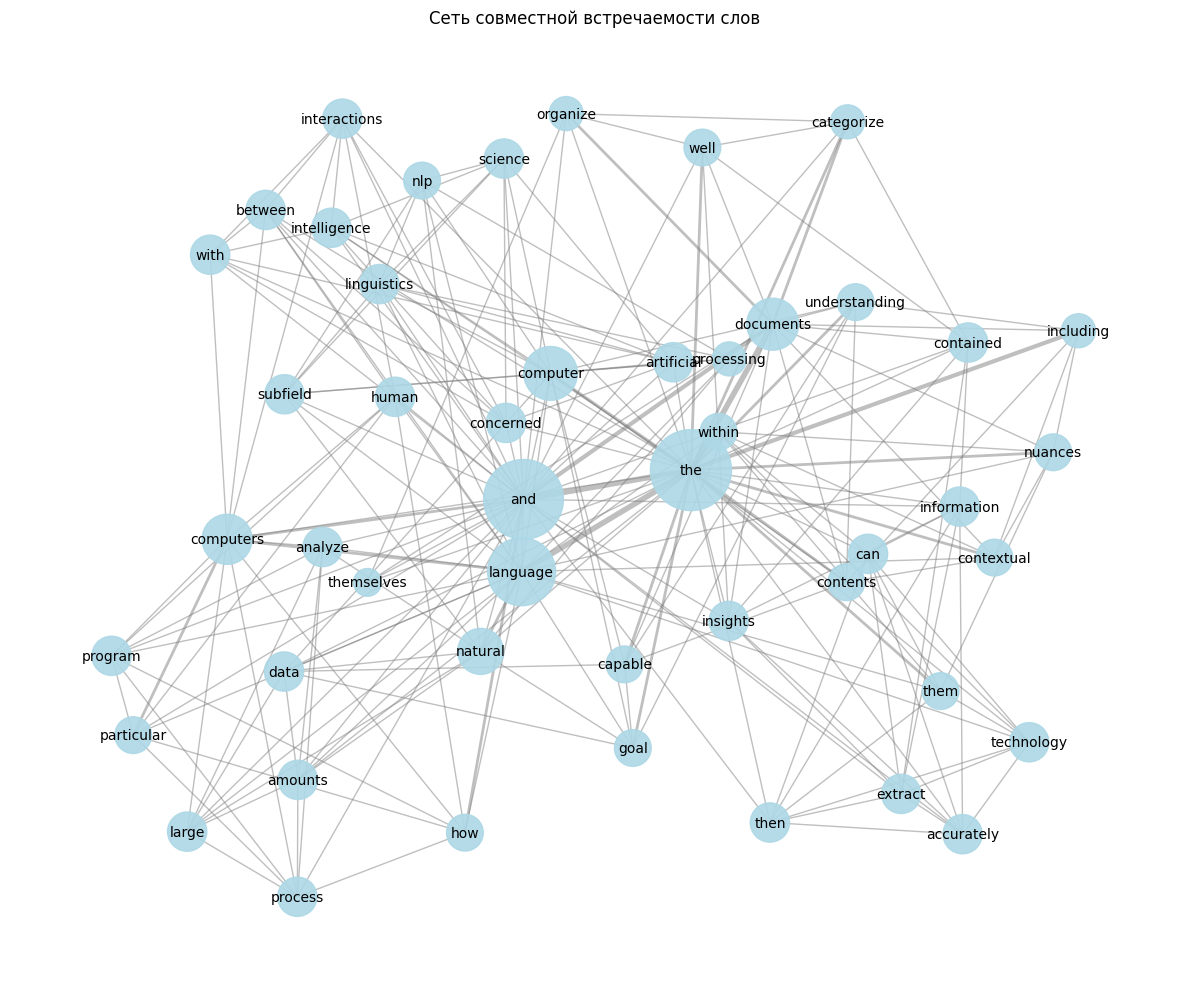

In [246]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt

# Загрузка необходимых данных NLTK (выполняется один раз)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

def preprocess_text(text):
    """Очистка и токенизация текста."""
    # Приведение к нижнему регистру
    text = text.lower()
    # Удаление пунктуации и цифр
    text = re.sub(r'[^a-z\s]', '', text)
    # Токенизация
    tokens = nltk.word_tokenize(text)
    # Удаление стоп-слов
    #stop_words = set(stopwords.words('english'))  # можно заменить на 'russian' для русского
    stop_words = set(stopwords.words('russian'))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return tokens

def get_frequent_ngrams(tokens, n=2, top_k=10):
    """Получение самых частых n-грамм."""
    n_grams = list(ngrams(tokens, n))
    freq_ngrams = Counter(n_grams)
    return freq_ngrams.most_common(top_k)

def build_cooccurrence_graph(tokens, window_size=4):
    """Построение графа совместной встречаемости слов."""
    G = nx.Graph()
    for i, word in enumerate(tokens):
        for j in range(i + 1, min(i + window_size + 1, len(tokens))):
            neighbor = tokens[j]
            if word != neighbor:
                if G.has_edge(word, neighbor):
                    G[word][neighbor]['weight'] += 1
                else:
                    G.add_edge(word, neighbor, weight=1)
    return G

def visualize_graph(G, title="Word Co-occurrence Network"):
    """Визуализация графа."""
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G, k=1, iterations=50)

    # Размер узлов пропорционален степени (количеству связей)
    degrees = dict(G.degree())
    node_sizes = [v * 100 for v in degrees.values()]

    # Веса рёбер
    edges = G.edges(data=True)
    weights = [d['weight'] for (u, v, d) in edges]

    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue', alpha=0.9)
    nx.draw_networkx_edges(G, pos, width=weights, alpha=0.5, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def analyze_text(text, top_ngrams=10, window_size=4):
    """Основная функция анализа текста."""
    tokens = preprocess_text(text)

    print("Топ-10 биграмм:")
    bigrams = get_frequent_ngrams(tokens, n=2, top_k=top_ngrams)
    for gram, freq in bigrams:
        print(f"{' '.join(gram)}: {freq}")

    print("\nТоп-10 триграмм:")
    trigrams = get_frequent_ngrams(tokens, n=3, top_k=top_ngrams)
    for gram, freq in trigrams:
        print(f"{' '.join(gram)}: {freq}")

    # Построение и визуализация графа
    G = build_cooccurrence_graph(tokens, window_size=window_size)
    # Ограничим граф до 50 самых связанных узлов для читаемости
    if len(G.nodes) > 50:
        # Выбираем топ-50 узлов по степени
        top_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:50]
        G = G.subgraph([node for node, deg in top_nodes]).copy()

    visualize_graph(G, "Сеть совместной встречаемости слов")

# Пример использования
if __name__ == "__main__":
    sample_text = """
    Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence
    concerned with the interactions between computers and human language, in particular how to program computers
    to process and analyze large amounts of natural language data. The goal is a computer capable of understanding
    the contents of documents, including the contextual nuances of the language within them. The technology can
    then accurately extract information and insights contained in the documents as well as categorize and organize
    the documents themselves.
    """

    analyze_text(sample_text)

Топ-10 биграмм:

Топ-10 триграмм:


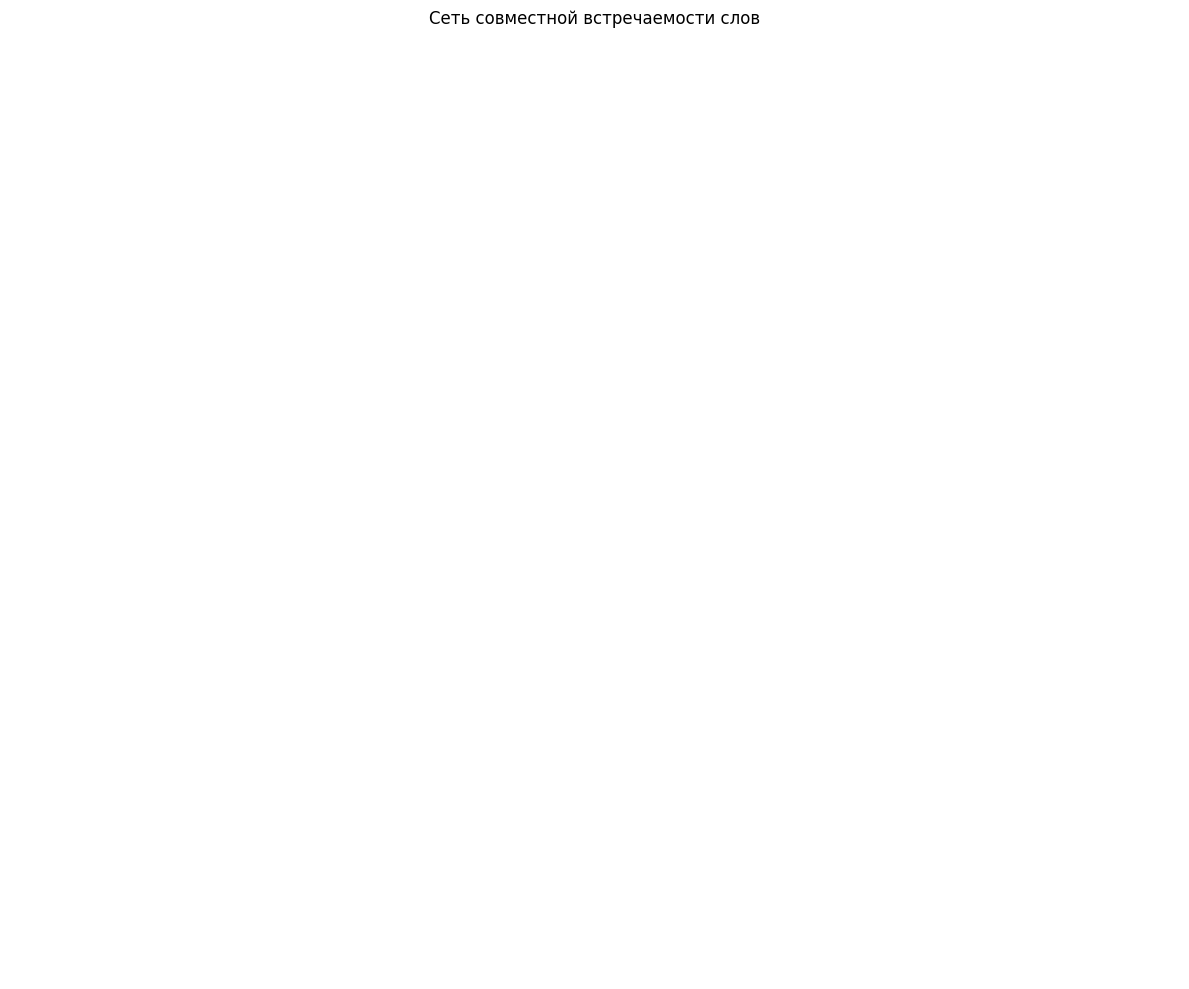

In [251]:
analyze_text(x)

Принимает DataFrame pandas с текстовыми данными (например, столбец 'text').

Объединяет все тексты в один корпус (или обрабатывает построчно — по желанию).

Анализирует частотные словосочетания (биграммы/триграммы).

Строит и визуализирует граф совместной встречаемости слов на основе всего корпуса.

🔍 Предобработка текста...

✅ Всего токенов: 20

🔝 Топ-5 биграмм:
natural language: 1
language processing: 1
processing wonderful: 1
wonderful field: 1
field machine: 1

🔝 Топ-5 триграмм:
natural language processing: 1
language processing wonderful: 1
processing wonderful field: 1
wonderful field machine: 1
field machine learning: 1

🕸️ Построение графа совместной встречаемости...
📊 Граф содержит 18 узлов и 64 рёбер.


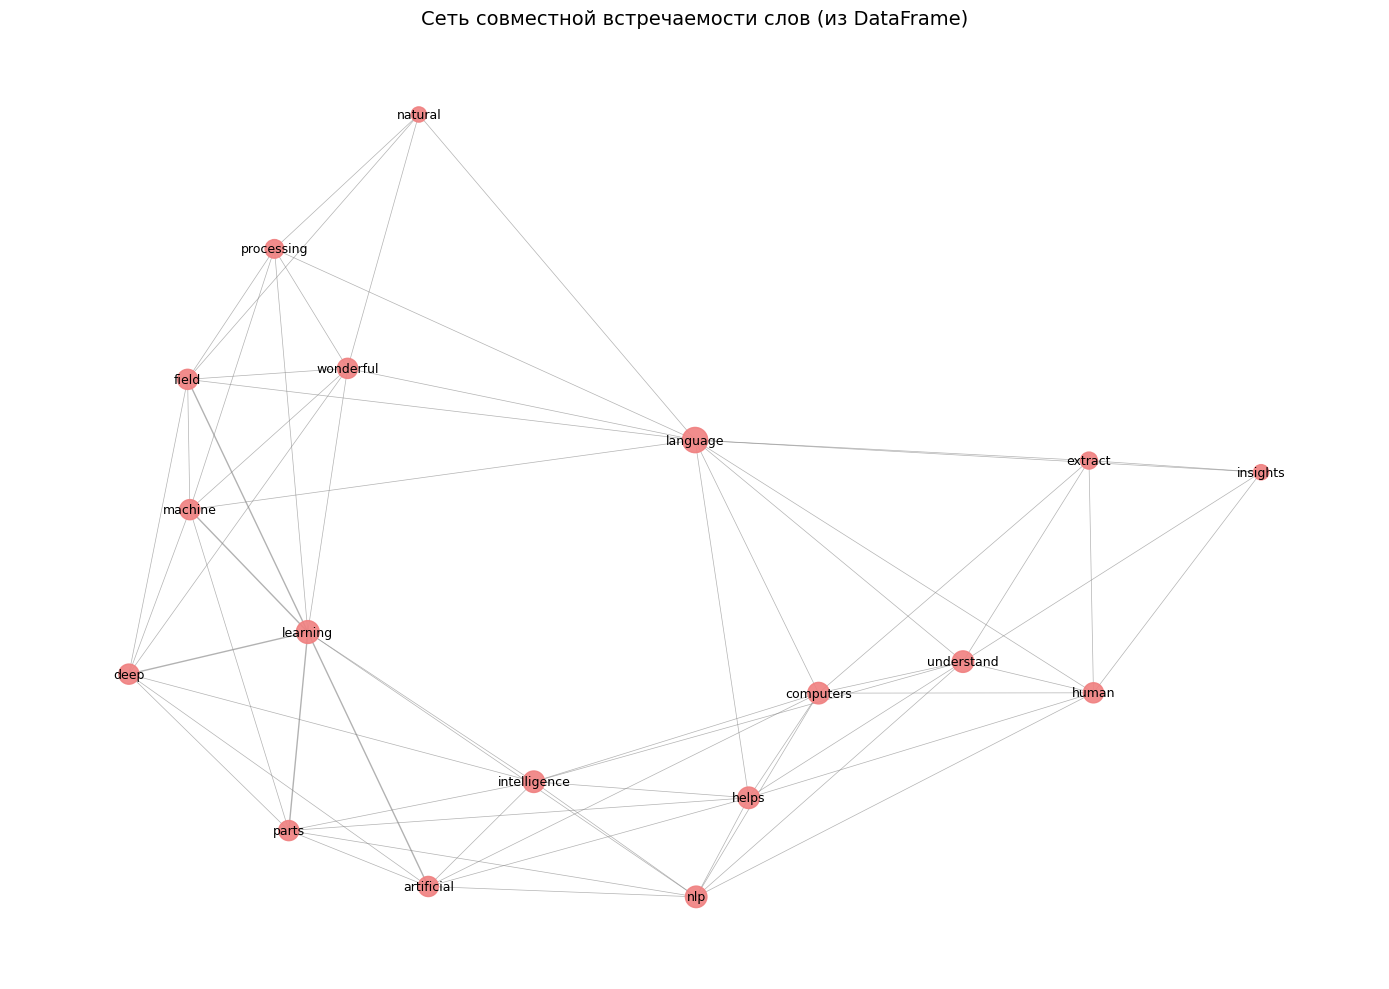

In [253]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt

# Загрузка NLTK-ресурсов (тихо)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

def preprocess_text(text, language='english'):
    """
    Очистка и токенизация одного текста.
    Поддерживает 'english' и 'russian'.
    """
    if pd.isna(text):
        return []
    text = str(text).lower()
    # Удаление всего, кроме букв и пробелов
    text = re.sub(r'[^a-zа-яё\s]', '', text, flags=re.IGNORECASE)
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words(language))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return tokens

def get_corpus_from_dataframe(df, text_column='text', language='english'):
    """
    Извлекает и объединяет все тексты из столбца DataFrame в единый список токенов.
    """
    all_tokens = []
    for text in df[text_column]:
        tokens = preprocess_text(text, language=language)
        all_tokens.extend(tokens)
    return all_tokens

def get_frequent_ngrams(tokens, n=2, top_k=10):
    """Получение топ-N n-грамм."""
    n_grams = list(ngrams(tokens, n))
    freq_ngrams = Counter(n_grams)
    return freq_ngrams.most_common(top_k)

def build_cooccurrence_graph(tokens, window_size=4):
    """Строит граф совместной встречаемости слов в пределах окна."""
    G = nx.Graph()
    for i, word in enumerate(tokens):
        for j in range(i + 1, min(i + window_size + 1, len(tokens))):
            neighbor = tokens[j]
            if word != neighbor:
                if G.has_edge(word, neighbor):
                    G[word][neighbor]['weight'] += 1
                else:
                    G.add_edge(word, neighbor, weight=1)
    return G

def visualize_graph(G, title="Word Co-occurrence Network"):
    """Визуализация графа."""
    plt.figure(figsize=(14, 10))
    pos = nx.spring_layout(G, k=0.5, iterations=50, seed=42)

    degrees = dict(G.degree())
    node_sizes = [max(v * 30, 100) for v in degrees.values()]  # Минимальный размер узла

    edges = G.edges(data=True)
    weights = [d['weight'] for (u, v, d) in edges]
    edge_widths = [w * 0.5 for w in weights]  # Масштабируем толщину

    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightcoral', alpha=0.9)
    nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.6, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=9, font_family='sans-serif')

    plt.title(title, fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def analyze_dataframe(df, text_column='text', language='english', top_ngrams=10, window_size=4, max_nodes=50):
    """
    Полный анализ текстового DataFrame.

    Параметры:
    - df: pandas.DataFrame
    - text_column: имя столбца с текстом
    - language: 'english' или 'russian'
    - top_ngrams: сколько топ-n-грамм выводить
    - window_size: размер окна для построения графа
    - max_nodes: максимальное число узлов в графе (для читаемости)
    """
    print("🔍 Предобработка текста...")
    tokens = get_corpus_from_dataframe(df, text_column=text_column, language=language)

    if not tokens:
        print("⚠️ Нет токенов после предобработки. Проверьте данные и язык.")
        return

    print(f"\n✅ Всего токенов: {len(tokens)}")

    # Анализ n-грамм
    print(f"\n🔝 Топ-{top_ngrams} биграмм:")
    bigrams = get_frequent_ngrams(tokens, n=2, top_k=top_ngrams)
    for gram, freq in bigrams:
        print(f"{' '.join(gram)}: {freq}")

    print(f"\n🔝 Топ-{top_ngrams} триграмм:")
    trigrams = get_frequent_ngrams(tokens, n=3, top_k=top_ngrams)
    for gram, freq in trigrams:
        print(f"{' '.join(gram)}: {freq}")

    # Построение графа
    print("\n🕸️ Построение графа совместной встречаемости...")
    G = build_cooccurrence_graph(tokens, window_size=window_size)

    if len(G.nodes) == 0:
        print("⚠️ Граф пуст. Возможно, текст слишком короткий или не содержит связей.")
        return

    # Ограничение числа узлов для визуализации
    if len(G.nodes) > max_nodes:
        top_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:max_nodes]
        G = G.subgraph([node for node, deg in top_nodes]).copy()

    print(f"📊 Граф содержит {G.number_of_nodes()} узлов и {G.number_of_edges()} рёбер.")
    visualize_graph(G, "Сеть совместной встречаемости слов (из DataFrame)")

# Пример использования
if __name__ == "__main__":
    # Пример DataFrame
    data = {
        'id': [1, 2, 3],
        'text': [
            "Natural language processing is a wonderful field of AI.",
            "Machine learning and deep learning are parts of artificial intelligence.",
            "NLP helps computers understand human language and extract insights."
        ]
    }
    df = pd.DataFrame(data)

    # Анализ
    analyze_dataframe(df, text_column='text', language='english', top_ngrams=5)

🔍 Предобработка текста...

✅ Всего токенов: 794

🔝 Топ-5 биграмм:
ппб зот: 16
алрпг апрпг: 16
апрпг алрпг: 15
апрпг апрпг: 13
зот ппб: 13

🔝 Топ-5 триграмм:
апрпг алрпг апрпг: 5
алрпг апрпг алрпг: 5
ппб зот апнбк: 4
ппб зот ппб: 4
апрпг алрпг ппб: 3

🕸️ Построение графа совместной встречаемости...
📊 Граф содержит 50 узлов и 386 рёбер.


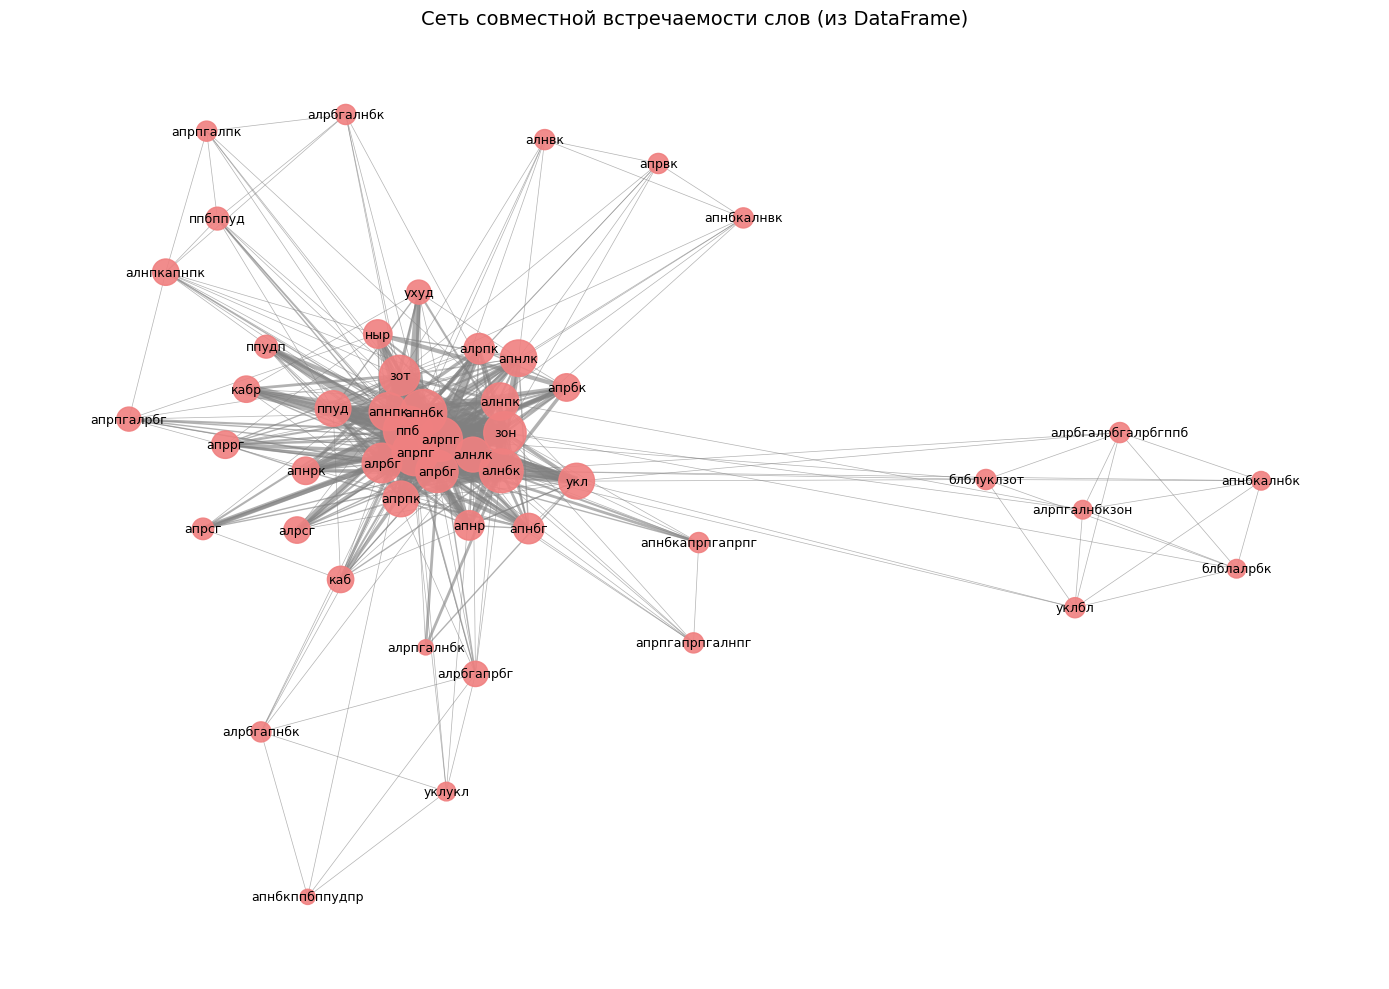

In [254]:
df_ru = pd.DataFrame({
    'review': [
        "Этот фильм очень интересный и захватывающий.",
        "Мне не понравился сюжет, но актёры играли отлично.",
        "Интересный сюжет и отличная игра актёров."
    ]
})

analyze_dataframe(df_word, text_column='act', language='russian', top_ngrams=5)

дополнительная функция, которая позволяет:

Выбрать одно или несколько ключевых слов (например, ['ai', 'language']),

Найти все биграммы и триграммы, содержащие эти слова,

Построить подграф, показывающий связи этих слов с их соседями в корпусе,

Визуализировать локальную сеть вокруг выбранных слов.

Это особенно полезно для анализа контекста упоминания конкретных терминов.
Для русского языка: target_words=['модель', 'язык'], language='russian'.

Функция автоматически покажет:

Граф с выделенными целевыми словами (красные узлы),

Их прямые связи,

Топ биграмм/триграмм с участием этих слов.

In [255]:
def visualize_word_context(df, target_words, text_column='text', language='english', window_size=4, max_hops=1):
    """
    Визуализирует контекстные связи для заданных целевых слов.

    Параметры:
    - df: pandas.DataFrame с текстами
    - target_words: список слов (в нижнем регистре!), например ['ai', 'nlp']
    - text_column: имя столбца с текстом
    - language: 'english' или 'russian'
    - window_size: размер окна для построения графа
    - max_hops: глубина поиска соседей (1 = прямые соседи, 2 = соседи соседей и т.д.)
    """
    target_words = [word.lower() for word in target_words]

    # Получаем полный корпус токенов
    tokens = get_corpus_from_dataframe(df, text_column=text_column, language=language)
    if not tokens:
        print("⚠️ Корпус пуст после предобработки.")
        return

    # Строим полный граф совместной встречаемости
    full_graph = build_cooccurrence_graph(tokens, window_size=window_size)

    # Находим подграф вокруг целевых слов
    nodes_to_include = set()
    for word in target_words:
        if word in full_graph:
            # Прямые соседи (1-hop)
            neighbors = set(full_graph.neighbors(word))
            nodes_to_include.update([word])
            nodes_to_include.update(neighbors)

            # Если нужно — добавляем соседей 2-го порядка
            if max_hops >= 2:
                for n in neighbors:
                    if n in full_graph:
                        nodes_to_include.update(full_graph.neighbors(n))
        else:
            print(f"⚠️ Слово '{word}' не найдено в графе.")

    if not nodes_to_include:
        print("❌ Ни одно из целевых слов не найдено в тексте.")
        return

    # Создаём подграф
    subgraph = full_graph.subgraph(nodes_to_include).copy()

    # Визуализация
    plt.figure(figsize=(12, 9))
    pos = nx.spring_layout(subgraph, k=1.0, iterations=100, seed=42)

    # Цвета: целевые слова — красные, остальные — синие
    node_colors = []
    node_sizes = []
    for node in subgraph.nodes():
        if node in target_words:
            node_colors.append('red')
            node_sizes.append(800)  # Крупнее
        else:
            node_colors.append('lightblue')
            node_sizes.append(300)

    # Рёбра
    edges = subgraph.edges(data=True)
    weights = [d['weight'] for (u, v, d) in edges]
    edge_widths = [w * 0.8 for w in weights]

    nx.draw_networkx_nodes(subgraph, pos, node_color=node_colors, node_size=node_sizes, alpha=0.9)
    nx.draw_networkx_edges(subgraph, pos, width=edge_widths, alpha=0.6, edge_color='gray')
    nx.draw_networkx_labels(subgraph, pos, font_size=10, font_family='sans-serif')

    # Легенда
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Целевые слова', markerfacecolor='red', markersize=12),
        Line2D([0], [0], marker='o', color='w', label='Контекстные слова', markerfacecolor='lightblue', markersize=12)
    ]
    plt.legend(handles=legend_elements, loc='upper right')

    plt.title(f"Контекстные связи для слов: {', '.join(target_words)}", fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Дополнительно: вывод биграмм и триграмм с участием целевых слов
    print(f"\n🔍 Биграммы и триграммы с участием слов: {target_words}")

    # Получаем все n-граммы из корпуса
    bigrams_all = list(ngrams(tokens, 2))
    trigrams_all = list(ngrams(tokens, 3))

    # Фильтрация
    bigrams_with_target = [gram for gram in bigrams_all if any(w in target_words for w in gram)]
    trigrams_with_target = [gram for gram in trigrams_all if any(w in target_words for w in gram)]

    # Подсчёт частот
    bigram_counts = Counter(bigrams_with_target)
    trigram_counts = Counter(trigrams_with_target)

    print("\n🔝 Топ-10 биграмм с участием целевых слов:")
    for gram, freq in bigram_counts.most_common(10):
        print(f"{' '.join(gram)}: {freq}")

    print("\n🔝 Топ-10 триграмм с участием целевых слов:")
    for gram, freq in trigram_counts.most_common(10):
        print(f"{' '.join(gram)}: {freq}")

=== Общий анализ ===
🔍 Предобработка текста...

✅ Всего токенов: 29

🔝 Топ-5 биграмм:
artificial intelligence: 2
natural language: 1
language processing: 1
processing wonderful: 1
wonderful field: 1

🔝 Топ-5 триграмм:
natural language processing: 1
language processing wonderful: 1
processing wonderful field: 1
wonderful field artificial: 1
field artificial intelligence: 1

🕸️ Построение графа совместной встречаемости...
📊 Граф содержит 24 узлов и 95 рёбер.


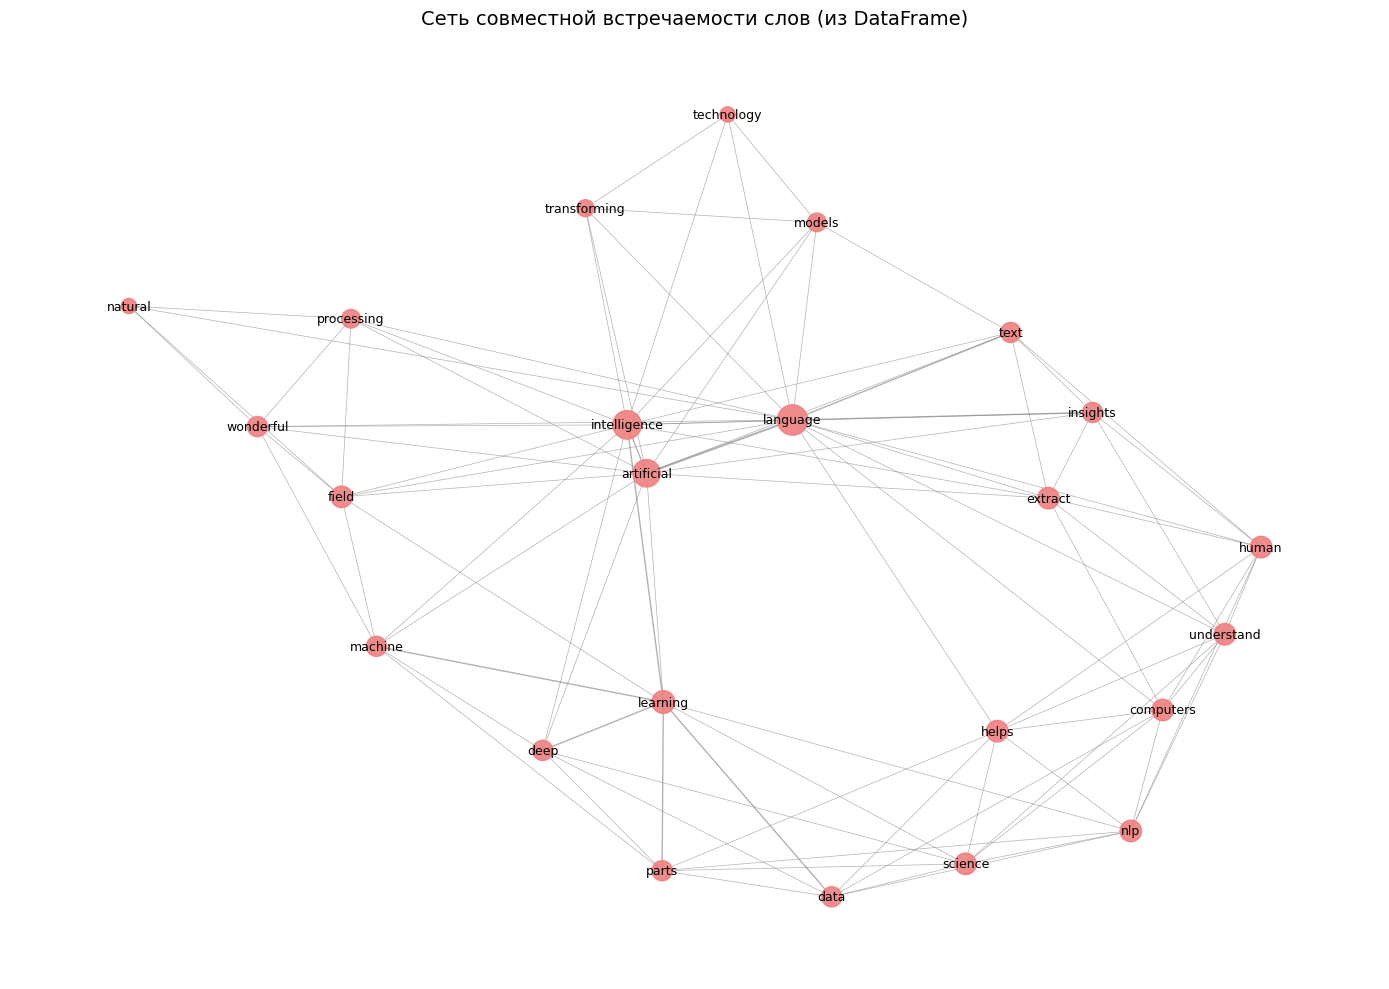


=== Анализ контекста для слов: 'ai', 'language' ===
⚠️ Слово 'ai' не найдено в графе.


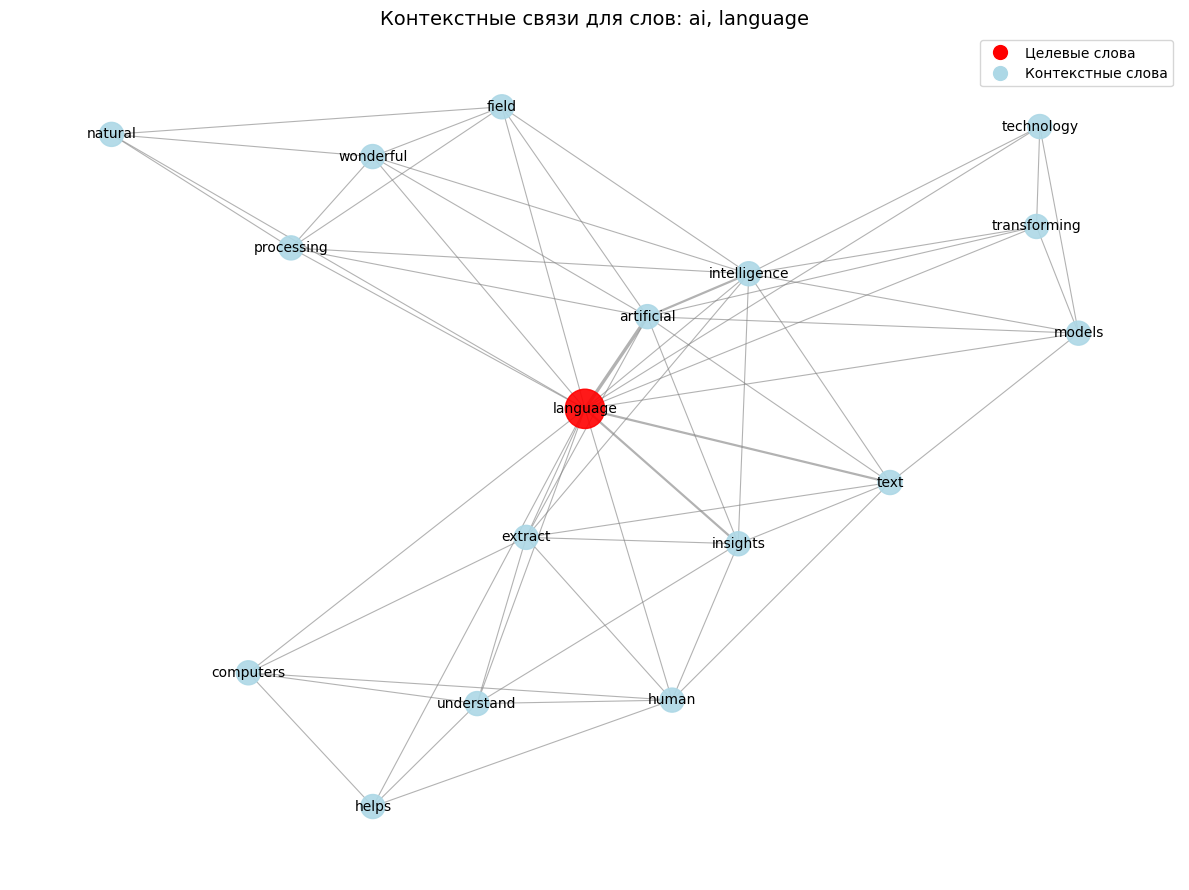


🔍 Биграммы и триграммы с участием слов: ['ai', 'language']

🔝 Топ-10 биграмм с участием целевых слов:
natural language: 1
language processing: 1
human language: 1
language extract: 1
intelligence language: 1
language models: 1

🔝 Топ-10 триграмм с участием целевых слов:
natural language processing: 1
language processing wonderful: 1
understand human language: 1
human language extract: 1
language extract insights: 1
artificial intelligence language: 1
intelligence language models: 1
language models transforming: 1


In [257]:
if __name__ == "__main__":
    # Пример DataFrame
    data = {
        'id': [1, 2, 3, 4],
        'text': [
            "Natural language processing is a wonderful field of artificial intelligence.",
            "Machine learning and deep learning are parts of AI and data science.",
            "NLP helps computers understand human language and extract insights from text.",
            "Artificial intelligence and language models are transforming technology."
        ]
    }
    df = pd.DataFrame(data)

    # 1. Общий анализ
    print("=== Общий анализ ===")
    analyze_dataframe(df, text_column='text', language='english', top_ngrams=5)

    # 2. Анализ контекста для конкретных слов
    print("\n=== Анализ контекста для слов: 'ai', 'language' ===")
    visualize_word_context(
        df,
        target_words=['ai', 'language'],  # слова в нижнем регистре!
        text_column='text',
        language='english',
        window_size=4,
        max_hops=1
    )


=== Анализ контекста для слов: 'ai', 'language' ===


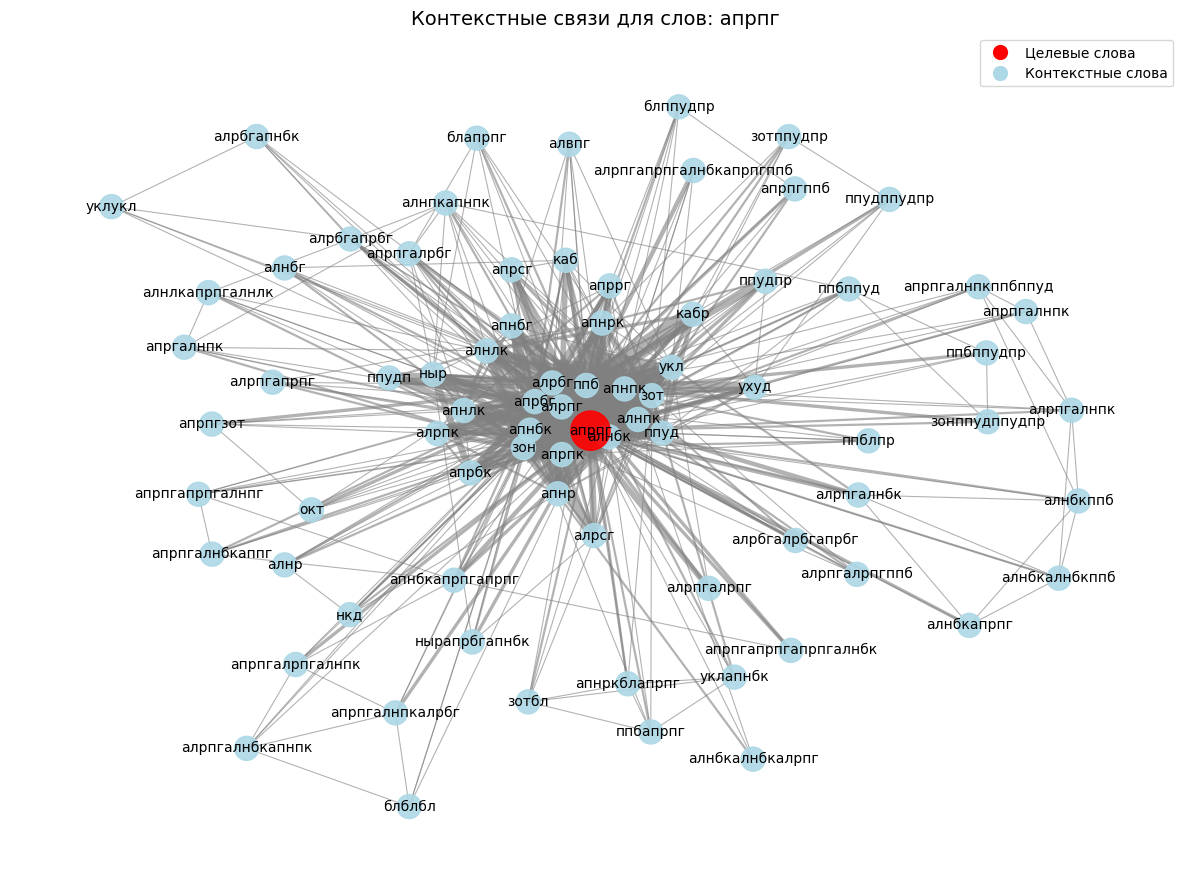


🔍 Биграммы и триграммы с участием слов: ['апрпг']

🔝 Топ-10 биграмм с участием целевых слов:
алрпг апрпг: 16
апрпг алрпг: 15
апрпг апрпг: 13
апрпг ппб: 12
ппб апрпг: 11
апрпг алнбк: 7
апнпк апрпг: 6
апнбк апрпг: 6
апрпг апнбк: 6
зон апрпг: 6

🔝 Топ-10 триграмм с участием целевых слов:
апрпг алрпг апрпг: 5
алрпг апрпг алрпг: 5
апрпг алрпг ппб: 3
алрпг апрпг апнбк: 3
ппб алрпг апрпг: 3
апрпг алрсг апнбк: 3
апрпг ппб зот: 3
апрпг апрпг алрпг: 2
зот апнпк апрпг: 2
апрпг апнпк апрбг: 2


In [258]:
    # 2. Анализ контекста для конкретных слов
    print("\n=== Анализ контекста для слов: 'ai', 'language' ===")
    visualize_word_context(
        df_word,
        target_words=['апрпг'],  # слова в нижнем регистре!
        text_column='act',
        language='russian',
        window_size=4,
        max_hops=1
    )

скрипт, который:

Извлекает слова, биграммы и триграммы из текстового корпуса (из pandas DataFrame).

Строит векторные представления (TF-IDF) для всех n-грамм.

Выполняет кластерный анализ с помощью алгоритма K-Means.

Визуализирует кластеры с помощью t-SNE (для 2D-проекции).

Поддерживает любой язык (английский/русский) и работает с pandas DataFrame.


In [ ]:
pip install pandas nltk scikit-learn matplotlib seaborn

In [259]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import numpy as np

# Загрузка NLTK
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

def preprocess_text_simple(text, language='english'):
    """Простая предобработка: нижний регистр, удаление пунктуации, стоп-слова."""
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r'[^a-zа-яё\s]', ' ', text, flags=re.IGNORECASE)
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words(language))
    tokens = [w for w in tokens if w not in stop_words and len(w) > 2]
    return " ".join(tokens)

def get_all_ngrams_as_strings(df, text_column='text', language='english', include_unigrams=True, include_bigrams=True, include_trigrams=True):
    """
    Возвращает список строк: каждая строка — это слово, биграмма или триграмма.
    Используется для кластеризации отдельных n-грамм как "документов".
    """
    all_ngrams_list = []

    for text in df[text_column]:
        clean = preprocess_text_simple(text, language=language)
        if not clean.strip():
            continue
        tokens = clean.split()

        if include_unigrams:
            all_ngrams_list.extend(tokens)
        if include_bigrams and len(tokens) >= 2:
            bigrams = [' '.join(gram) for gram in ngrams(tokens, 2)]
            all_ngrams_list.extend(bigrams)
        if include_trigrams and len(tokens) >= 3:
            trigrams_list = [' '.join(gram) for gram in ngrams(tokens, 3)]
            all_ngrams_list.extend(trigrams_list)

    # Удаляем дубликаты? Нет — оставляем частоту для TF-IDF!
    return all_ngrams_list

def cluster_ngrams(df, text_column='text', language='english',
                   include_unigrams=True, include_bigrams=True, include_trigrams=True,
                   n_clusters=5, ngram_min_df=1, ngram_max_features=1000,
                   random_state=42):
    """
    Кластеризация n-грамм (слов, биграмм, триграмм) как отдельных "документов".
    """
    print("🔍 Извлечение всех n-грамм...")
    ngram_docs = get_all_ngrams_as_strings(
        df, text_column=text_column, language=language,
        include_unigrams=include_unigrams,
        include_bigrams=include_bigrams,
        include_trigrams=include_trigrams
    )

    if len(ngram_docs) == 0:
        print("⚠️ Нет n-грамм для кластеризации.")
        return

    print(f"✅ Всего n-грамм (с повторами): {len(ngram_docs)}")
    unique_ngrams = list(set(ngram_docs))
    print(f"✅ Уникальных n-грамм: {len(unique_ngrams)}")

    # Векторизация: каждая n-грамма — "документ", TF-IDF по символам или под-n-граммам?
    # Но так как это отдельные фразы, лучше использовать char-ngrams или просто 1-вектор на фразу.
    # Однако для схожести фраз (например, "machine learning" и "deep learning") — используем char-level TF-IDF.

    # Альтернатива: рассматривать каждую n-грамму как документ и использовать word-level TF-IDF по её словам.
    # Но у нас каждая "фраза" — уже токен. Поэтому проще использовать **char-ngram TF-IDF** для сравнения строк.

    vectorizer = TfidfVectorizer(
        analyzer='char_wb',        # char-level с границами слов
        ngram_range=(2, 5),        # 2–5 символьных n-грамм
        min_df=ngram_min_df,
        max_features=ngram_max_features
    )

    X = vectorizer.fit_transform(unique_ngrams)
    print(f"📊 Размер матрицы признаков: {X.shape}")

    # Кластеризация
    print(f"🧠 Кластеризация на {n_clusters} кластеров...")
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
    clusters = kmeans.fit_predict(X)

    # Снижение размерности для визуализации
    print("📉 Применение t-SNE для 2D-визуализации...")
    tsne = TSNE(n_components=2, random_state=random_state, perplexity=min(30, len(unique_ngrams)-1))
    X_tsne = tsne.fit_transform(X.toarray())

    # Визуализация
    plt.figure(figsize=(12, 9))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='tab10', alpha=0.7)
    plt.colorbar(scatter)
    plt.title(f"Кластеры n-грамм (слов, биграмм, триграмм) — {n_clusters} кластеров", fontsize=14)
    plt.xlabel("t-SNE компонент 1")
    plt.ylabel("t-SNE компонент 2")
    plt.tight_layout()
    plt.show()

    # Вывод примеров из каждого кластера
    df_ngrams = pd.DataFrame({
        'ngram': unique_ngrams,
        'cluster': clusters
    })

    print(f"\n🔍 Примеры n-грамм по кластерам (топ-5 на кластер):")
    for cluster_id in range(n_clusters):
        examples = df_ngrams[df_ngrams['cluster'] == cluster_id]['ngram'].head(5).tolist()
        print(f"\nКластер {cluster_id}:")
        for ex in examples:
            print(f"  - {ex}")

    return df_ngrams, X, clusters

🔍 Извлечение всех n-грамм...
✅ Всего n-грамм (с повторами): 126
✅ Уникальных n-грамм: 114
📊 Размер матрицы признаков: (114, 775)
🧠 Кластеризация на 4 кластеров...
📉 Применение t-SNE для 2D-визуализации...


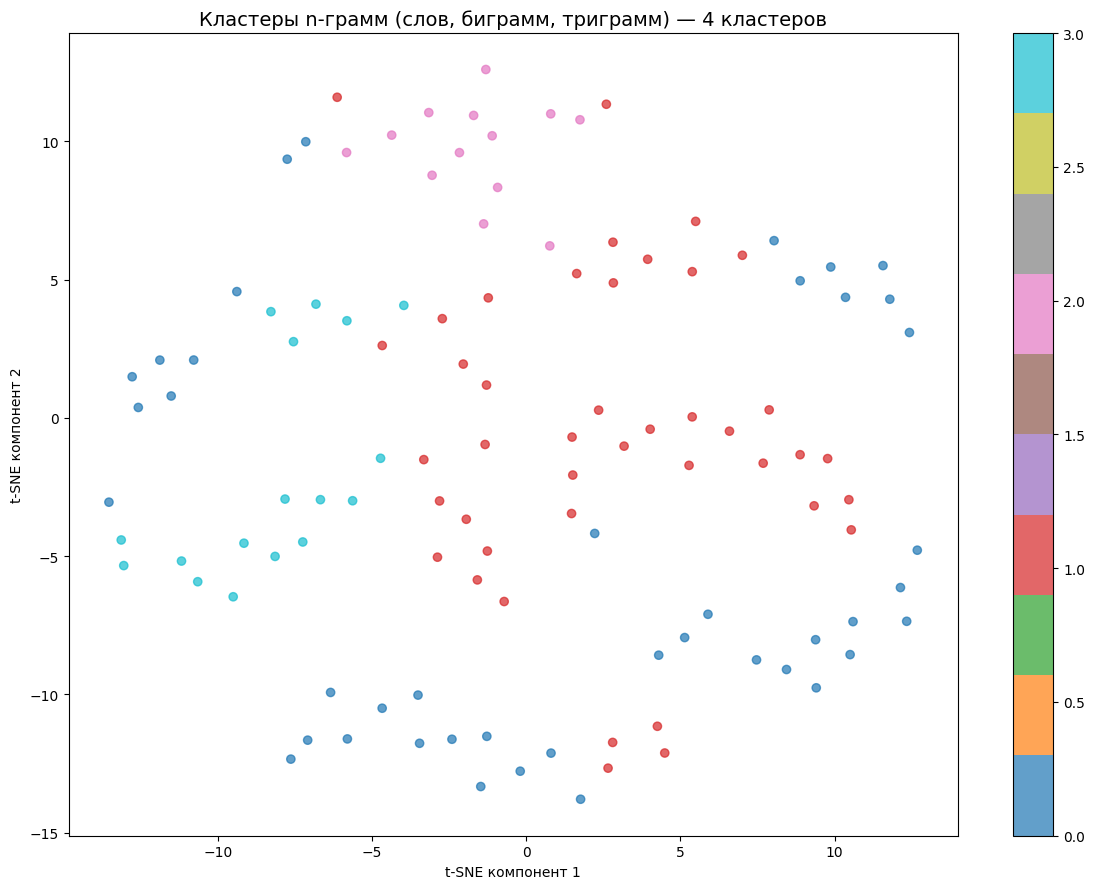


🔍 Примеры n-грамм по кластерам (топ-5 на кластер):

Кластер 0:
  - powerful gpus
  - bert gpt transforming
  - combines
  - neural
  - domain

Кластер 1:
  - intelligence uses
  - language models
  - models require large
  - require large
  - artificial intelligence uses

Кластер 2:
  - learning deep learning
  - learning deep
  - learning models require
  - machine learning deep
  - learning models

Кластер 3:
  - computers understand
  - models like bert
  - helps computers understand
  - human
  - nlp helps


In [262]:
if __name__ == "__main__":
    # Пример данных
    data = {
        'text': [
            "Natural language processing is a subfield of artificial intelligence.",
            "Machine learning and deep learning are key parts of AI.",
            "NLP helps computers understand human language and extract meaning.",
            "Artificial intelligence uses neural networks and big data.",
            "Language models like BERT and GPT are transforming NLP.",
            "Data science combines statistics, programming, and domain expertise.",
            "Deep learning models require large datasets and powerful GPUs."
        ]
    }
    df = pd.DataFrame(data)

    # Запуск кластерного анализа
    result_df, X, labels = cluster_ngrams(
        df,
        text_column='text',
        language='english',
        include_unigrams=True,
        include_bigrams=True,
        include_trigrams=True,
        n_clusters=4,
        ngram_max_features=800
    )

🔍 Извлечение всех n-грамм...
✅ Всего n-грамм (с повторами): 1636
✅ Уникальных n-грамм: 471
📊 Размер матрицы признаков: (471, 393)
🧠 Кластеризация на 4 кластеров...
📉 Применение t-SNE для 2D-визуализации...


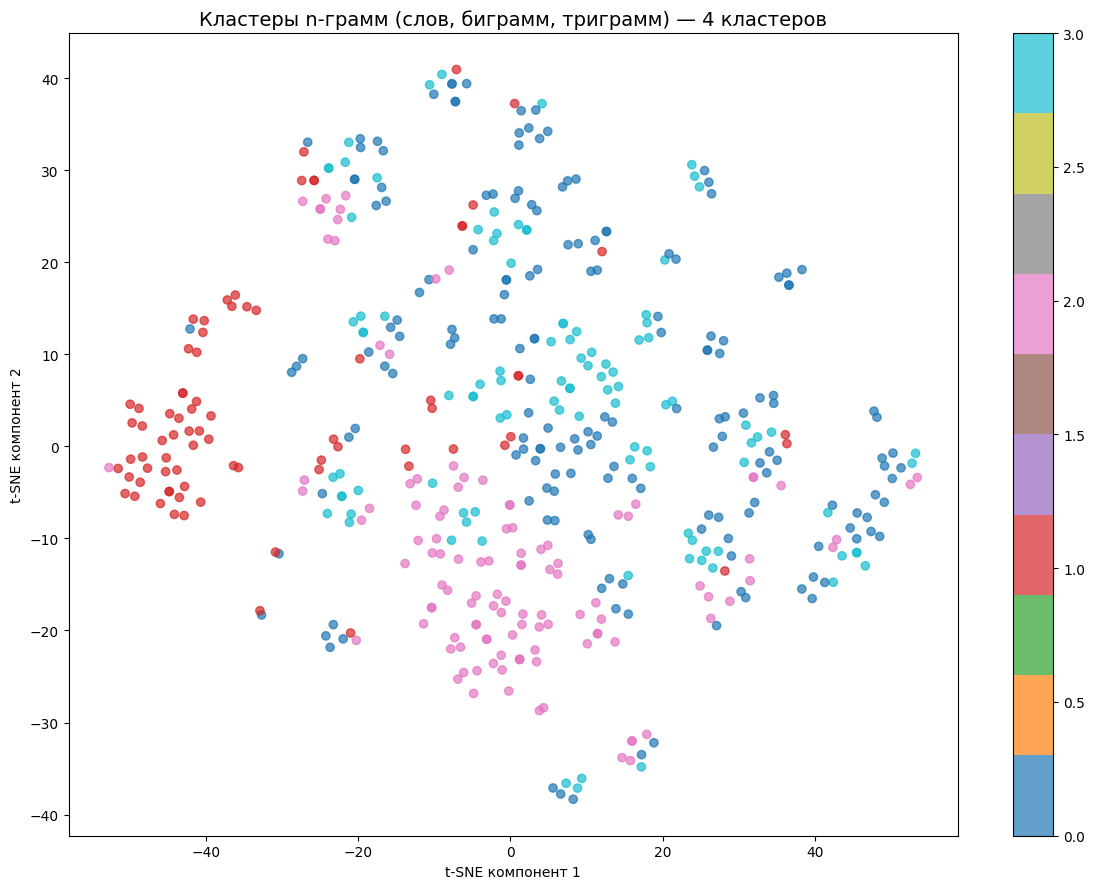


🔍 Примеры n-грамм по кластерам (топ-5 на кластер):

Кластер 0:
  - апнпк алрпг
  - алрпг апрпк алнбк
  - алнбк алнбк ппб
  - алнлк алрпг
  - алнбк алнбк

Кластер 1:
  - ппудп апнбк ппб
  - апнрк ппб
  - ппуд алнбк ппб
  - кабр ппб
  - ппб зон

Кластер 2:
  - зот алрбг ппб
  - алнпк алрбг
  - апрбг ппб
  - апрпк алнбк апрбг
  - алнбк апрбг

Кластер 3:
  - апрпг апрпг алнпг
  - апрпг апнпк апрбг
  - алрпг апрпг апрпг
  - апрпг алнпг апнбк
  - апрпг зон


In [261]:
if __name__ == "__main__":

    # Запуск кластерного анализа
    result_df, X, labels = cluster_ngrams(
        df_word,
        text_column='act',
        language='russian',
        include_unigrams=True,
        include_bigrams=True,
        include_trigrams=True,
        n_clusters=4,
        ngram_max_features=800
    )

In [263]:
    pip install --upgrade notebook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.6 MB/s eta 0:00:00
  Attempting uninstall: notebook
    Found existing installation: notebook 6.5.7
    Uninstalling notebook-6.5.7:
      Successfully uninstalled notebook-6.5.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-kernel-gateway 2.5.2 requires notebook<7.0,>=5.7.6, but you have notebook 7.4.7 which is incompatible.


In [249]:
df_word

,act
0,алнбк. алрпг
1,бл. апрпк
2,"апрбг. апрпг, апрпг, алрпг"
3,ппб. зот
4,"апнпк, апрпг. бл, алнлк"
...,...
370,апрпг. апрпг
371,"апрпг,алрпг,алнпк. апнбк"
372,"апрпг,алнпк,алрбг. зон"
373,"алрпг,алнбк,апнпк. бл,бл,бл"


# simple DB

In [ ]:
import sqlite3

con = sqlite3.connect("absrb2022.db")
cur = con.cursor()

In [ ]:
df_act.to_sql("actions", con=con, if_exists="append", index=False)

375

In [ ]:
df_spr.to_sql("guide", con=con, if_exists="append", index=False)

30

In [ ]:
df_par.to_sql("participants", con=con, if_exists="append", index=False)

40

In [ ]:
pd.read_sql('''
    SELECT *
    FROM actions
''', con)

,fighter1,fighter2,stage,start_ep,end_ep,attacker,actions_1,actions_2,results_1,results_2
0,ilkvl0198,karma0692,четвертьфинал,04:47:00.000000,04:48:00.000000,1,алнбк,алрпг,1,0
1,ilkvl0198,karma0692,четвертьфинал,04:31:00.000000,04:30:00.000000,2,бл,апрпк,0,0
2,ilkvl0198,karma0692,четвертьфинал,04:28:00.000000,04:26:00.000000,2,апрбг,"апрпг, апрпг, алрпг",1,"1,0,0"
3,ilkvl0198,karma0692,четвертьфинал,04:26:00.000000,04:25:00.000000,1,ппб,зот,А,0
4,ilkvl0198,karma0692,четвертьфинал,04:12:00.000000,04:10:00.000000,1,"апнпк, апрпг","бл, алнлк",0,0
...,...,...,...,...,...,...,...,...,...,...
370,nizul0198,fedni0301,финал,02:37:00.000000,02:33:00.000000,1,апрпг,апрпг,1,0
371,nizul0198,fedni0301,финал,02:32:00.000000,02:28:00.000000,1,"апрпг,алрпг,алнпк",апнбк,"1,0,1",1
372,nizul0198,fedni0301,финал,02:24:00.000000,02:21:00.000000,1,"апрпг,алнпк,алрбг",зон,"1,1,0",0
373,nizul0198,fedni0301,финал,02:20:00.000000,02:17:00.000000,1,"алрпг,алнбк,апнпк","бл,бл,бл","0,0,0","0,0,0"


In [ ]:
pd.read_sql('''
    SELECT *
    FROM participants
''', con)

,id,nation,place,weight_over_73,birthdate
0,gusil0194,Russia,1,0,1994-01-21 00:00:00
1,makda0401,Russia,2,0,2001-04-03 00:00:00
2,khias0501,Uzbekistan,3,0,2001-05-16 00:00:00
3,dravl0587,Belarus,3,0,1987-05-26 00:00:00
4,ilkvl0198,Belarus,5,0,1998-01-23 00:00:00
5,musam0499,Kyrgyz Republic,5,0,1999-04-01 00:00:00
6,husah0390,Lebanon,7,0,1990-03-23 00:00:00
7,ergim0795,Uzbekistan,7,0,1995-07-07 00:00:00
8,elahm0900,Syria,9,0,2000-09-23 00:00:00
9,racul0297,Kyrgyz Republic,9,0,1997-02-26 00:00:00


In [ ]:
pd.read_sql('''
    SELECT *
    FROM guide
''', con)

,action,abbreviation,description
0,атака,алрпг,атака левой рукой прямой удар в область головы
1,атака,апрпг,атака правой рукой прямой удар в область головы
2,атака,алнбк,атака левой ногой боковой удар в туловище
3,атака,апнбк,атака правой ногой боковой удар в туловище
4,атака,алрбг,атака левой рукой боковой удар в область головы
5,атака,апрбк,атака правой рукой боковой удар в область головы
6,атака,алнпк,атака левой ногой боковой удар в туловище
7,атака,апнпк,атака правой ногой прямой удар в туловище
8,атака,ппб,попытка проведения броска
9,атака,алнлк,атака левой ногой по ноге (лоу кик)


In [ ]:
with con:
    cur.execute("""
        CREATE TABLE participants (
            id INT NOT NULL PRIMARY KEY,
            name TEXT,
            nation TEXT,
            place INTEGER,
            weight_over_73 INTEGER,
            birthdate DATE
        );
    """)

OperationalError: table participants already exists

In [ ]:
with con:
    cur.execute ("""
        CREATE TABLE actions1 (
            fighter1 TEXT,
            fighter2 TEXT,
            stage INT,
            start_ep TIME,
            end_ep TIME,
            attacker INT,
            actions_1 TEXT,
            actions_2 TEXT,
            results_1 TEXT,
            results_2 TEXT,

            PRIMARY KEY(fighter1, fighter2),
            FOREIGN KEY(fighter1) REFERENCES participants(id),
            FOREIGN KEY(fighter2) REFERENCES participants(id)
        );
    """)

In [ ]:
df_act.to_sql("actions1", con=con, if_exists="append", index=False)